In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/spotify_data.csv")
data.drop(["Unnamed: 0"],axis='columns',inplace=True)
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
data.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [ ]:
data.shape

(2017, 16)

In [ ]:
data.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [ ]:
data.describe

<bound method NDFrame.describe of       acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0          0.01020         0.833       204600   0.434          0.021900    2   
1          0.19900         0.743       326933   0.359          0.006110    1   
2          0.03440         0.838       185707   0.412          0.000234    2   
3          0.60400         0.494       199413   0.338          0.510000    5   
4          0.18000         0.678       392893   0.561          0.512000    5   
...            ...           ...          ...     ...               ...  ...   
2012       0.00106         0.584       274404   0.932          0.002690    1   
2013       0.08770         0.894       182182   0.892          0.001670    1   
2014       0.00857         0.637       207200   0.935          0.003990    0   
2015       0.00164         0.557       185600   0.992          0.677000    1   
2016       0.00281         0.446       204520   0.915          0.000039    9   

      liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0       0.1650    -8.795     1       0.4310  150.062             4.0    0.286   
1       0.1370   -10.401     1       0.0794  160.083             4.0    0.588   
2       0.1590    -7.148     1       0.2890   75.044             4.0    0.173   
3       0.0922   -15.236     1       0.0261   86.468             4.0    0.230   
4       0.4390   -11.648     0       0.0694  174.004             4.0    0.904   
...        ...       ...   ...          ...      ...             ...      ...   
2012    0.1290    -3.501     1       0.3330   74.976             4.0    0.211   
2013    0.0528    -2.663     1       0.1310  110.041             4.0    0.867   
2014    0.2140    -2.467     1       0.1070  150.082             4.0    0.470   
2015    0.0913    -2.735     1       0.1330  150.011             4.0    0.623   
2016    0.2180    -6.221     1       0.1410  190.013             4.0    0.402   

      target                            song_title            artist  
0          1                              Mask Off            Future  
1          1                               Redbone  Childish Gambino  
2          1                          Xanny Family            Future  
3          1                        Master Of None       Beach House  
4          1                        Parallel Lines       Junior Boys  
...      ...                                   ...               ...  
2012       0   Like A Bitch - Kill The Noise Remix    Kill The Noise  
2013       0                                 Candy    Dillon Francis  
2014       0  Habit - Dack Janiels & Wenzday Remix          Rain Man  
2015       0                         First Contact        Twin Moons  
2016       0                    I Wanna Get Better         Bleachers  

[2017 rows x 16 columns]>

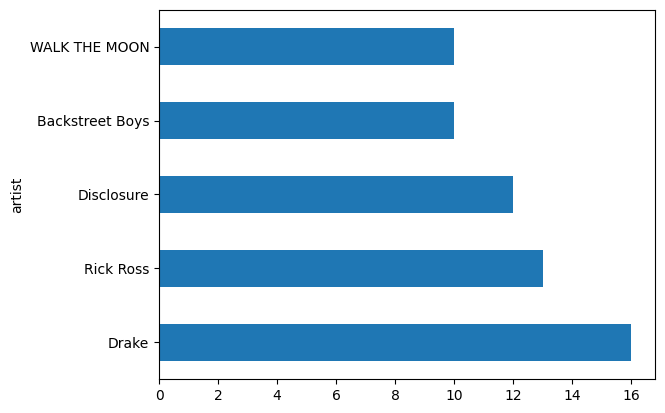

In [ ]:
top_five_artists = data.groupby("artist").count().sort_values(by="song_title", ascending=False)["song_title"][:5]
top_five_artists.plot.barh()
plt.show()

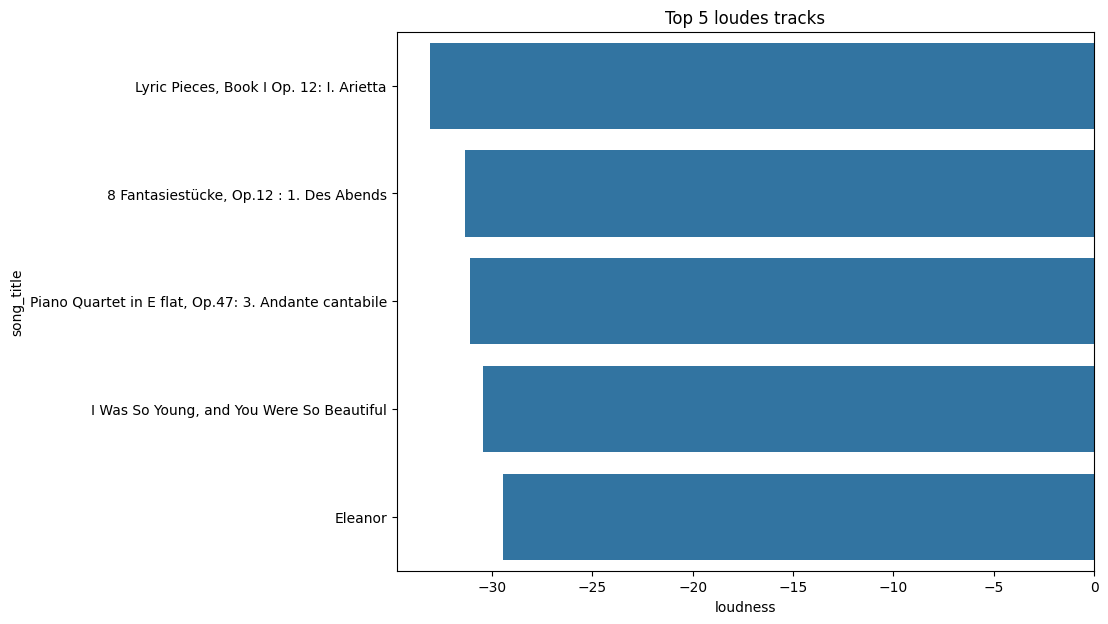

In [ ]:
top_five_loudest_tracks = data[["loudness", "song_title"]].sort_values(by="loudness", ascending=True)[:5]
top_five_loudest_tracks
plt.figure(figsize=(9, 7))
sns.barplot(x="loudness", y="song_title", data=top_five_loudest_tracks)
plt.title("Top 5 loudes tracks")
plt.show()

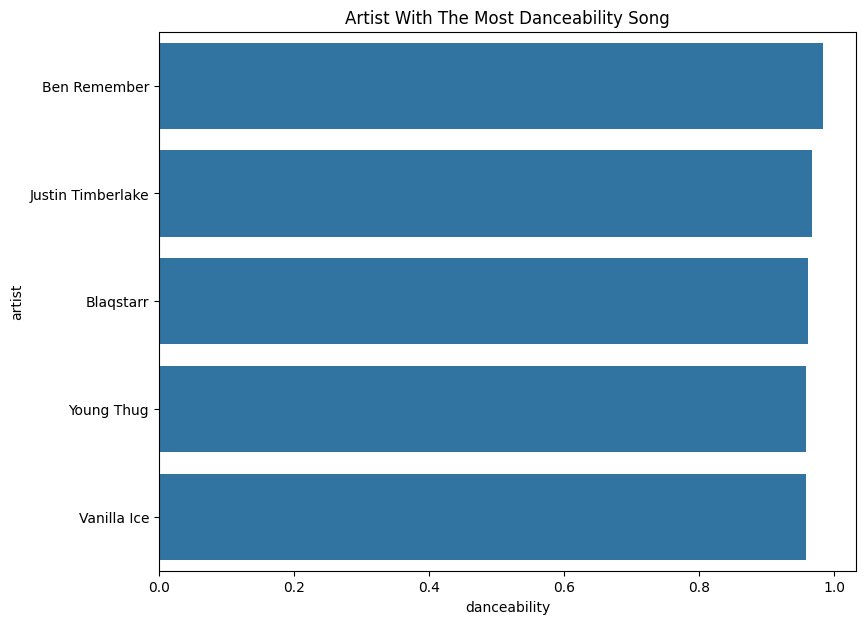

In [ ]:
top_five_artists_danceable_songs = data[["danceability", "song_title", "artist"]].sort_values(by="danceability",
                                                                                            ascending=False)[:5]
plt.figure(figsize=(9, 7))
sns.barplot(x="danceability", y="artist", data=top_five_artists_danceable_songs)
plt.title("Artist With The Most Danceability Song")
plt.show()

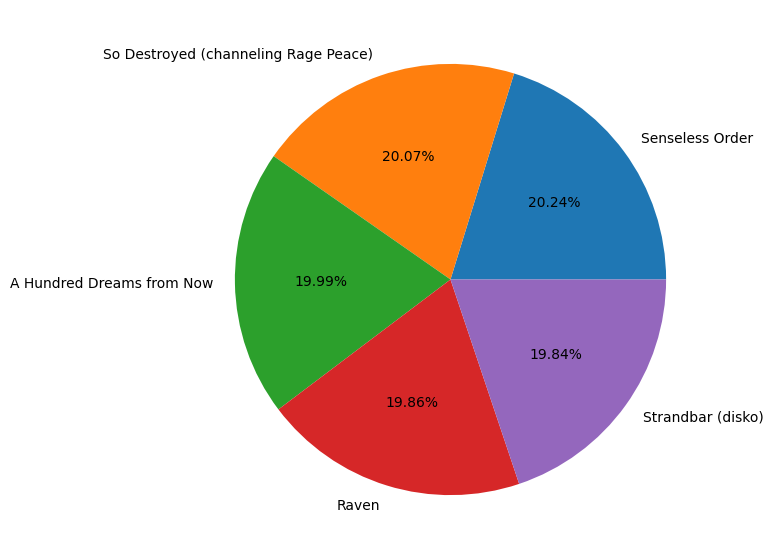

In [ ]:
top_ten_instrumental_tracks = data[["instrumentalness", "song_title", "artist"]].sort_values(by="instrumentalness",
                                                                                           ascending=False)[:5]
# top_ten_instrumental_tracks
plt.figure(figsize=(9, 7))
plt.pie(x="instrumentalness", data=top_ten_instrumental_tracks, autopct='%1.2f%%', labels=top_ten_instrumental_tracks.song_title)
plt.show()

In [ ]:

interest_feature_cols = ["tempo", "loudness", "acousticness", "danceability", "duration_ms",
                         "energy", "instrumentalness", "liveness", "speechiness", "valence"]

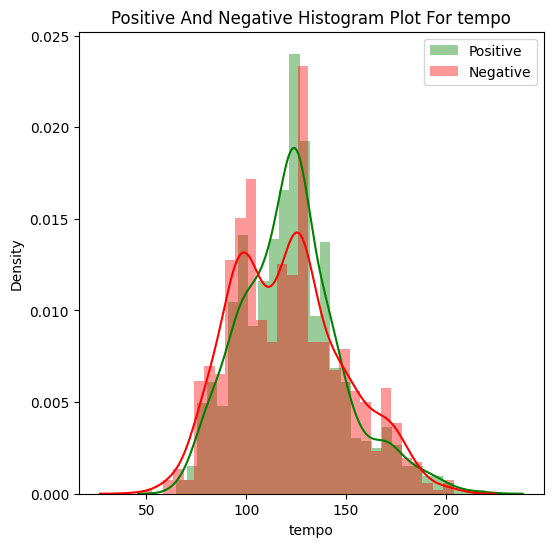

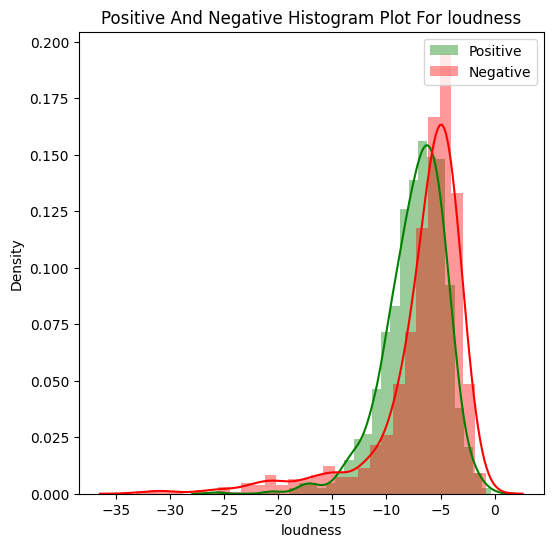

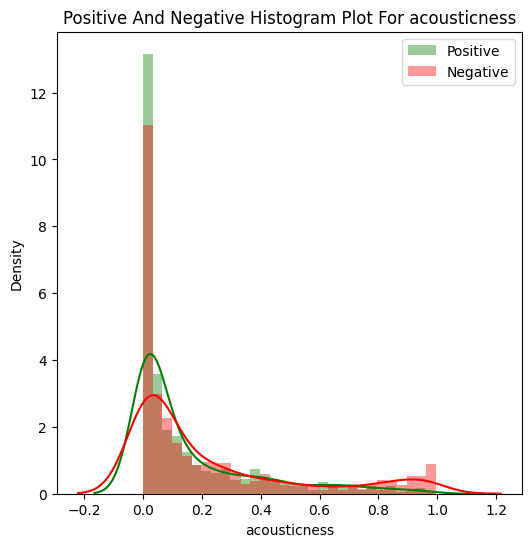

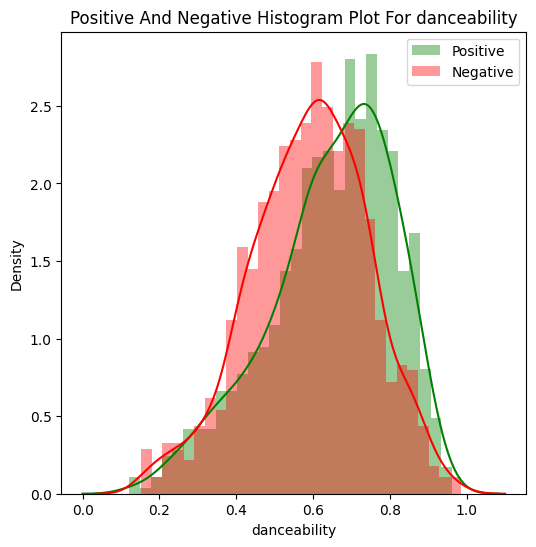

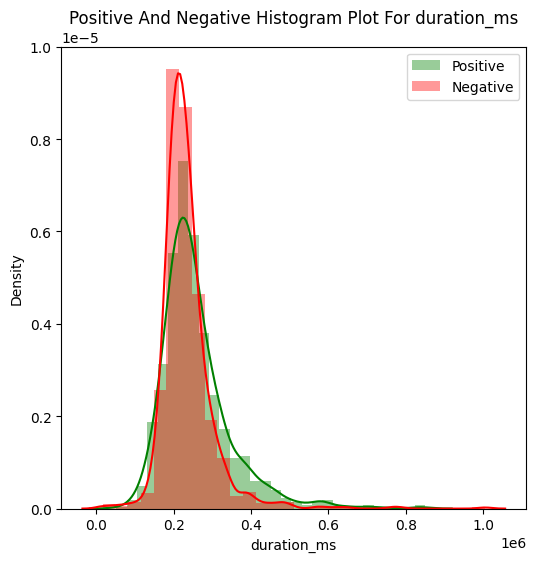

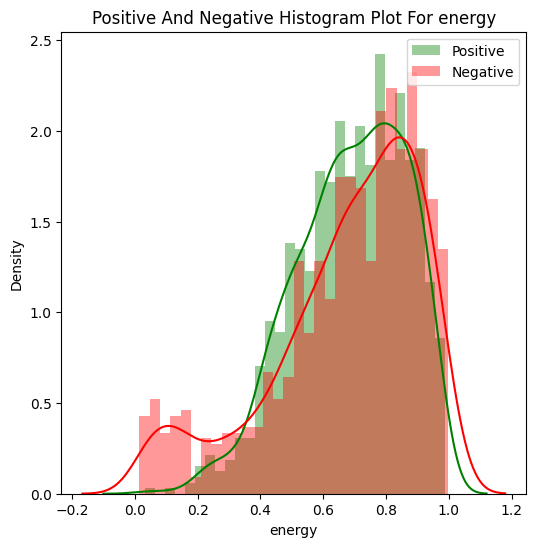

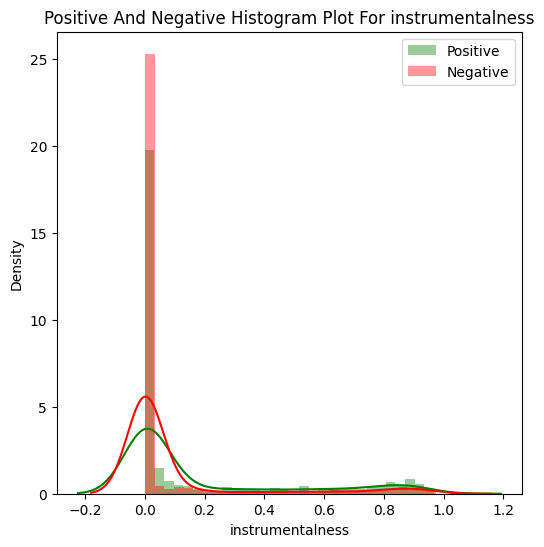

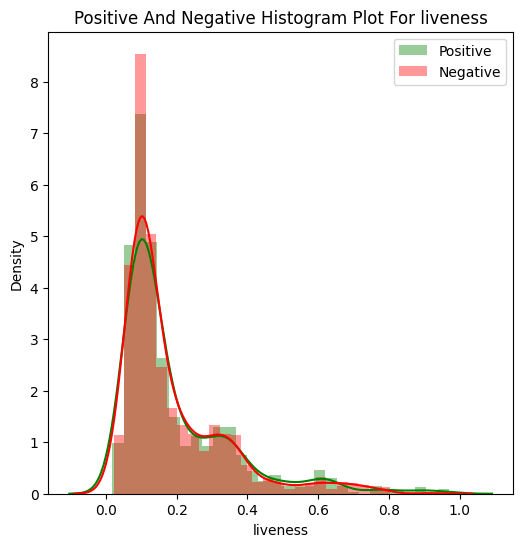

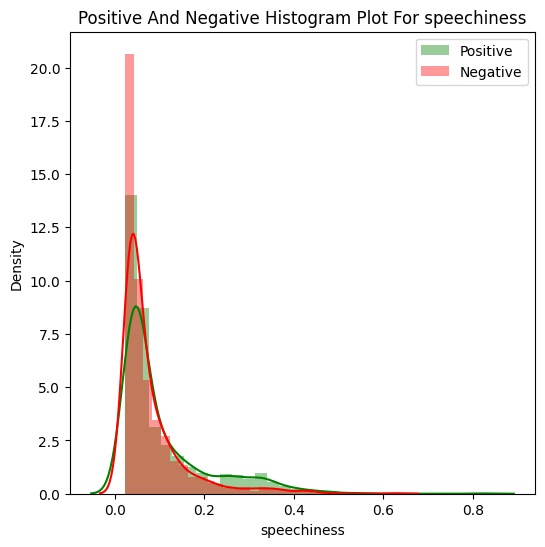

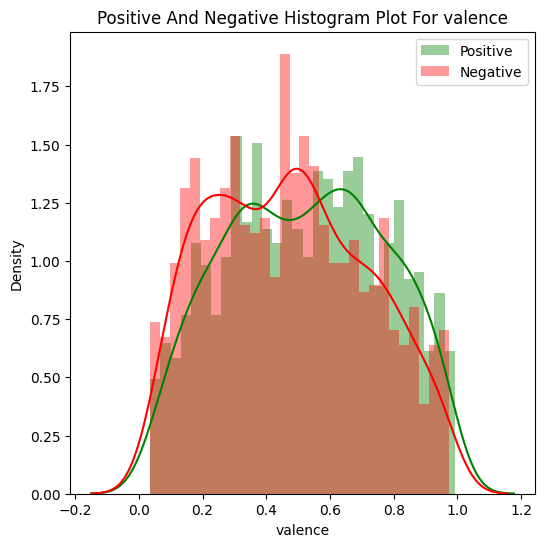

In [ ]:
for feature_col in interest_feature_cols:
    pos_data = data[data["target"] == 1][feature_col]
    neg_data = data[data["target"] == 0][feature_col]

    plt.figure(figsize=(6,6))


    sns.distplot(pos_data, bins=30, label="Positive", color="green")
    sns.distplot(neg_data, bins=30, label="Negative", color="red")


    plt.legend(loc="upper right")
    plt.title(f"Positive And Negative Histogram Plot For {feature_col}")
    plt.show()